In [9]:
#khai báo các thư viện
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from scipy.stats import kurtosis
from matplotlib import pyplot as plt

In [2]:
# lấy dữ liệu
df = pd.read_fwf("babies.txt")
df

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


2.Biểu diễn hình học của dữ liệu
1. Dữ liệu cân nặng của trẻ trong trƣờng hợp bà mẹ hút thuốc và bà mẹ không hút thuốc
Ta sẽ phân tích các biểu đồ:
 Histogram
 Boxplot
a) Histogram trong trường hợp bà mẹ có hút thuốc:

<Axes: ylabel='Frequency'>

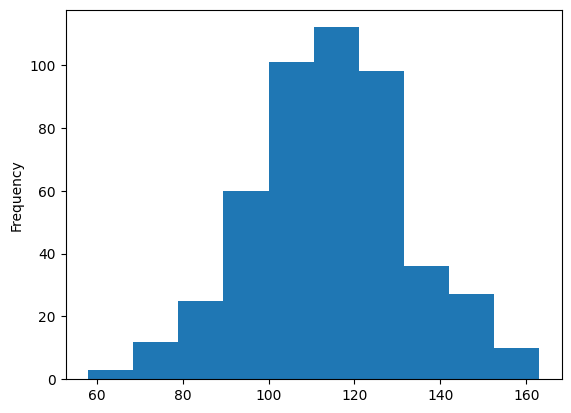

In [3]:
df.loc[(df.smoke== 1),'bwt'].plot.hist()

Vị trí tập trung dữ liệu: khoảng 110
Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng [50-170]
Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần
và tốc độ giảm vừa phải.
Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên
đỉnh dữ liệu cũng phân bố vừa phải.
Giá trị ngoại lệ: không thấy rõ có giá trị ngoại lệ nào đáng kể

Boxplot: 

<Axes: xlabel='bwt'>

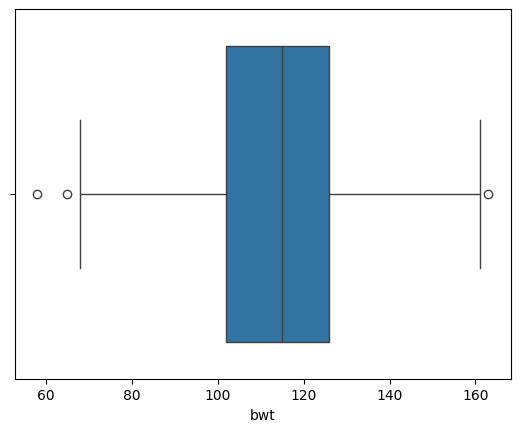

In [4]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 1)])

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ [102,126]
Giá trị ngoại lệ: có một số giá trị ngoại lệ (lớn hơn 162, nhỏ hơn 66) nhưng không nhiều.

b) Histogram và Boxplot trong trường hợp bà mẹ không hút thuốc:

<Axes: ylabel='Frequency'>

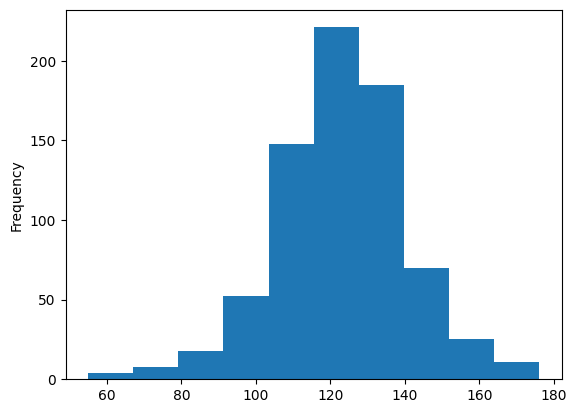

In [5]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()

Vị trí tập trung dữ liệu: khoảng 120
Tính biến động của dữ liệu: dữ liệu phân bố trong khoảng [50-175]
Tính đối xứng của phân bố dữ liệu: dữ liệu chỉ có 1 đỉnh. Bắt đầu từ đỉnh, hai bên giảm dần và tốc độ giảm vừa phải. 
Dữ liệu phân bố gần đối xứng, hơi lệch về phía trái. Hai bên đuôi có độ dài vừa phải. Hai bên đỉnh dữ liệu cũng phân bố vừa phải.
Giá trị ngoại lệ: không thấy rõ có giá trị ngoại lệ nào đáng kể

Boxplot:

<Axes: xlabel='bwt'>

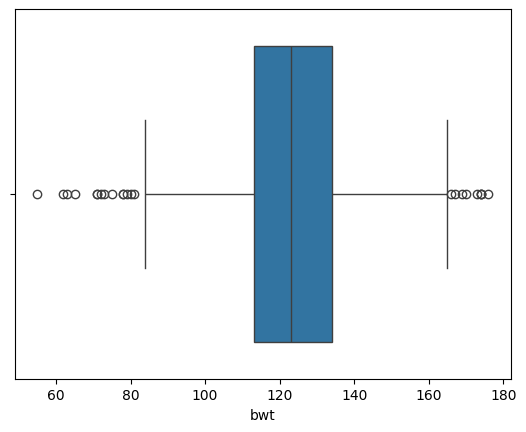

In [6]:
sns.boxplot(x='bwt', data = df.loc[(df.smoke== 0)])

Tính biến động của dữ liệu: dữ liệu phân bố tập trung trong khoảng từ [116,136]
Giá trị ngoại lệ: có một số giá trị ngoại lệ (lớn hơn 168, nhỏ hơn 81) nhưng không nhiều.

2. Dữ liệu cân nặng của trẻ trong trƣờng hợp bà mẹ hút thuốc không hút thuốc
Phần này sinh viên tự thực hiện
So sánh hai tập dữ liệu dựa vào các biểu diễn hình học:
a) Histogram

<Axes: ylabel='Frequency'>

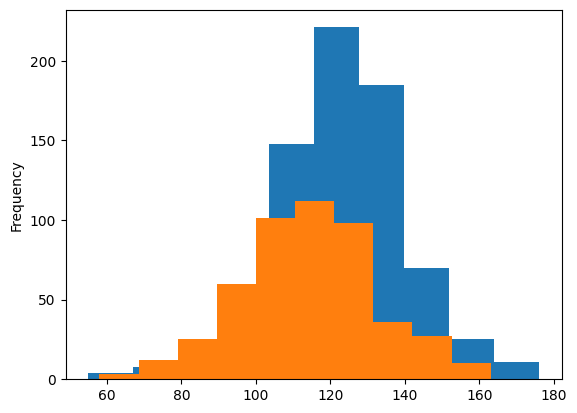

In [7]:
df.loc[(df.smoke== 0),'bwt'].plot.hist()
df.loc[(df.smoke== 1),'bwt'].plot.hist()

Cân nặng của trẻ trẻ trong trƣờng hợp bà mẹ không hút thuốc cáo hơn so với trƣờng
hợp bà mẹ có hút thuốc
Tính biến thiên của 2 tập dữ liệu: tương tự nhau
Tính đối xứng của 2 tập dữ liệu: tương tự nhau

b. Boxplot

<Axes: xlabel='smoke', ylabel='bwt'>

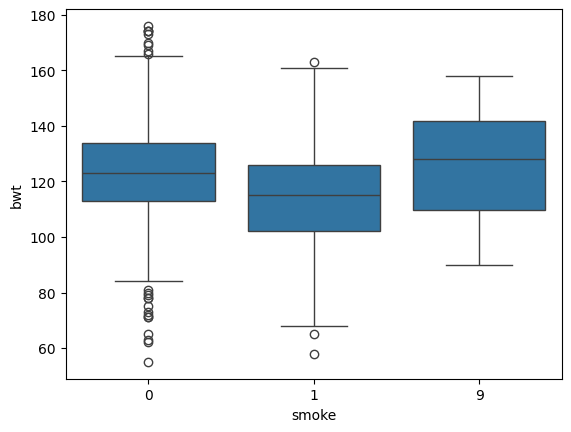

In [8]:
sns.boxplot(x='smoke', y='bwt',data= df)

Khác biệt về vị trí: giá trị trung vị của trường hợp bà mẹ không hút thuốc lớn hơn trường hợp bà mẹ có hút thuốc (123 và 115). (Trường hợp smoke=9 là trường hợp không biết bà mẹ có hút thuốc hay không, trung vị trong trường hợp này cao hơn so với 2 trường hợp bà mẹ có hút thuốc và không hút thuốc).
Giá trị ngoại lệ: cả 2 trường hợp đều có giá trị ngoại lệ trên và dưới. Trường hợp không hút 
thuốc có nhiều giá trị ngoại lệ hơn. 
Ta dùng thêm đồ thị QQ-plot để phân tích

So sánh QQ-plot phân bố của 2 tập dữ liệu:

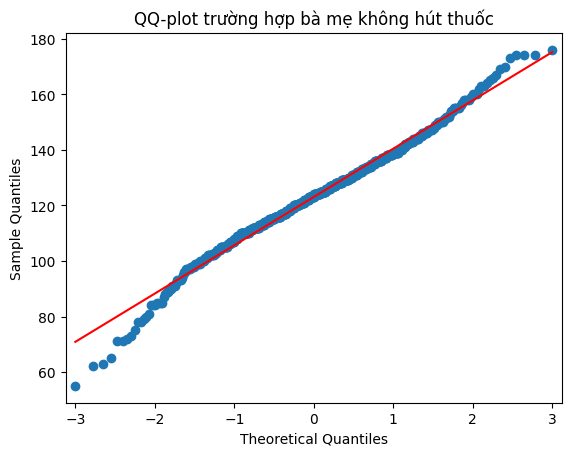

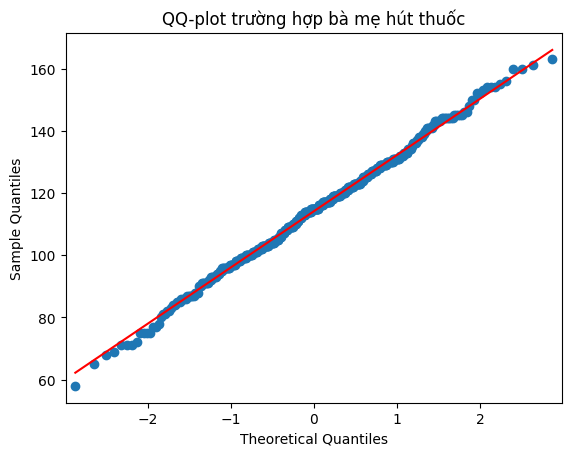

In [10]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(df.loc[(df.smoke== 0),'bwt'], line="s")
plt.title('QQ-plot trường hợp bà mẹ không hút thuốc')
plt.show()
sm.qqplot(df.loc[(df.smoke== 1),'bwt'],line="s")
plt.title('QQ-plot trường hợp bà mẹ hút thuốc')
plt.show()